###  Introduction 
Different dynamics have contriuted to continuous evolution of the entertainment industry in recent years. For instance, technology has played a critical role in meeting the high  demand for quality and original video contents. This reality has prompted many movie companies to reinvent themseves in the production, capture and share of quality products to the market. Our company is not left behind on these emerging trends. We are setting up a new movie studio with an objective of capturing the market expectations by producing quality and original  films.  

To succeed in this, just like in any other venjure, we need a workig strategic plan and a comprehensive understanding knowledge of the market trends. First, we need to determine the types of films that are currenly dominating the market and analyze key characteristics and factors that contribute to commercial success.

Our project will explore the major successful films in the industry today and extract actionable insights to inform our movie studio's content strategy. By aligning our creative vision with the market's proven preferences, we aim to maximize our chances of producing hit films that capture the imagination of audiences worldwide.

### Importing Libraries

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

## Objectives

### 1. What are the audiences preferrences?

### 2. Which movies are most profitable in terms of revenue and profit margin?

### 3. Which genre  had highest ratings?

In [2]:
rating_df = pd.read_csv("./DataSets/rt.movie_info.tsv",sep ='\t')

#### Data Cleaning

In [3]:
rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
#Checking for duplicates;There are no duplicates in my dataset
duplicated =rating_df.duplicated().sum()
duplicated

0

In [5]:
#Check for missing values
missing =rating_df.isnull().sum()
missing 

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [6]:
#Fill the NA values in synopsis with No synopsis available
rating_df['synopsis'].fillna("No synopsis available", inplace=True)
#   In rating null =mode
mode_rating = rating_df['rating'].mode()[0]
rating_df['rating'].fillna(mode_rating, inplace=True)
#Replace missing genre with unknown 
rating_df['genre'].fillna("Unknown", inplace=True)
#Replace writing with unknown
rating_df['writer'].fillna("Unknown", inplace=True)
#Drop rows with missing theatre date 
rating_df.dropna(subset=['theater_date'], inplace=True)
#Fill na directors as Unknown
rating_df['director'].fillna("Unknown", inplace=True)



In [7]:
#Dropping bot currency and box office columns 
rating_df.drop(columns=['currency', 'box_office'], inplace=True)
#Dropping the nulls in runtime colmnn
rating_df.dropna(subset=['runtime'], inplace=True)
#Checking if we have any null values 
rating_df.isnull().sum()

id                0
synopsis          0
rating            0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
runtime           0
studio          734
dtype: int64

#### Data types

In [8]:
rating_df.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
runtime         object
studio          object
dtype: object

In [9]:
#Converting Data type
#ID to Integer 
rating_df['id'] = rating_df['id'].astype(int)
#Date to datetime
rating_df['theater_date'] = pd.to_datetime(rating_df['theater_date'], errors='coerce')
rating_df['dvd_date'] = pd.to_datetime(rating_df['dvd_date'], errors='coerce')
#Remove text in runtime and converting the data to int 
rating_df['runtime'] = rating_df['runtime'].str.replace(' minutes', '').astype(int)

In [10]:
rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,95,Warner Bros. Pictures


In [11]:
#Assighn the rating to numerical values
rating_df["rating"].unique()

array(['R', 'PG', 'PG-13', 'NR', 'G', 'NC17'], dtype=object)

In [12]:
#Mapping 
rating_mapping = {'R': 1, 'PG': 2, 'PG-13': 3, 'NR': 4, 'G': 5, 'NC17': 6}
rating_df['numeric_rating'] = rating_df['rating'].map(rating_mapping)

### Data Visualization 

In [13]:
#### 10 most popular Movies

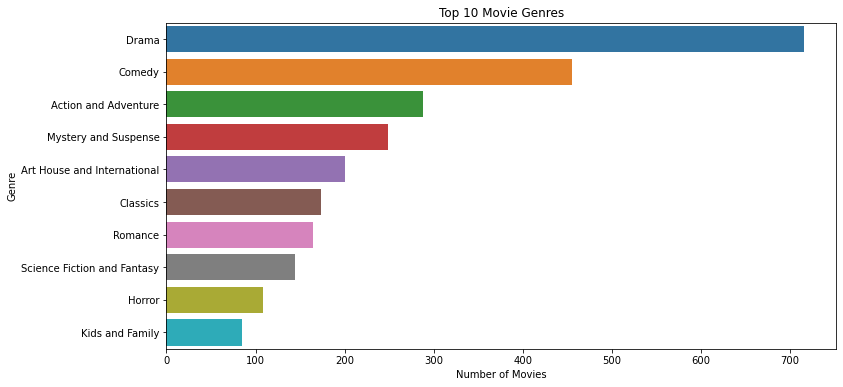

In [14]:
#An Histogram presentation of Genre and the number of movie counts
rating_df['genre'] = rating_df['genre'].fillna('').apply(lambda x: x.split('|'))
genre_counts = rating_df.explode('genre')['genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

#### Interpretation

-The bar plot shows that the Drama Gernre has a a lot of movies produced followed by the comedy genre


#### A ratings vs top 10 studio plot

This is a plot to show the studio and how the ratings are spread across the top 10 studios

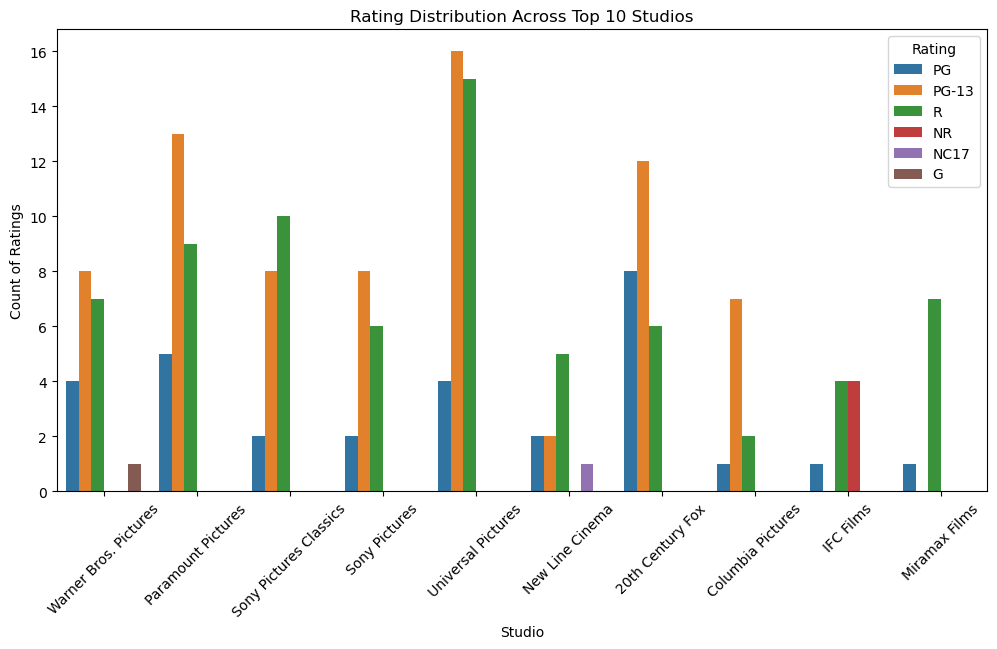

In [ ]:
studio_rating_counts = rating_df.groupby(['studio', 'numeric_rating'])

# Plotting the data
top_studios = rating_df['studio'].value_counts().nlargest(10).index
top_studio_data = rating_df[rating_df['studio'].isin(top_studios)]
plt.figure(figsize=(12, 6))
sns.countplot(data=top_studio_data, x='studio', hue='rating')
plt.title("Rating Distribution Across Top 10 Studios")
plt.xlabel("Studio")
plt.ylabel("Count of Ratings")
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()

##### Observation 

The independent Studios hav the highest number of movies produced

#### Checking for normality

We want to check if our ratings follow a normal distribution.We will use the Shapiro-wilk Test


In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
ratings = (rating_df['numeric_rating'])
stat, p_value = shapiro(ratings)
alpha =0.05 
if p_value > alpha :
    print ("The p-value is greater than 0.05, hence we fail to reject the null hypothesis since we do not have enough evidence."
            "we can conclude that the ratings does not significantly deviate from a normal distribution.")
else:
    print("The p-value is less than 0.05 , hence we reject the null hypothesis at 0.05 level of significance and "
          "conclude that the ratings significantly deviates from the normal distribution")

Our Rating data does not have a normal distribution 

### 4.How movie release dates vary by month and determine peak release times e.g school holidays, Christmas, Valentines

In [ ]:
# Load the budget dataset 
budget = pd.read_csv("DataSets/tn.movie_budgets.csv")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Remove dollar signs and commas from budget and revenue columns and convert them to numeric
currency_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in currency_columns:
    budget[col] = budget[col].replace('[\$,]', '', regex=True).astype(float)
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [ ]:
# Convert release_date to datetime and extract month and year for analysis
budget['release_date'] = pd.to_datetime(budget['release_date'], errors='coerce')
budget['release_month'] = budget['release_date'].dt.month
budget['release_year'] = budget['release_date'].dt.year
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017


### Aggregating Monthly Data
Grouping by release_month to calculate the count of movies released and the average budget, domestic gross, and worldwide gross.

In [ ]:
# Aggregate data by month to analyze release trends and financials
monthly_data =budget.groupby('release_month').agg(
    release_count=('id', 'size'),  # Count of movies released
    avg_budget=('production_budget', 'mean'),  # Average production budget
    avg_domestic_gross=('domestic_gross', 'mean'),  # Average domestic revenue
    avg_worldwide_gross=('worldwide_gross', 'mean')  # Average worldwide revenue
).reset_index()

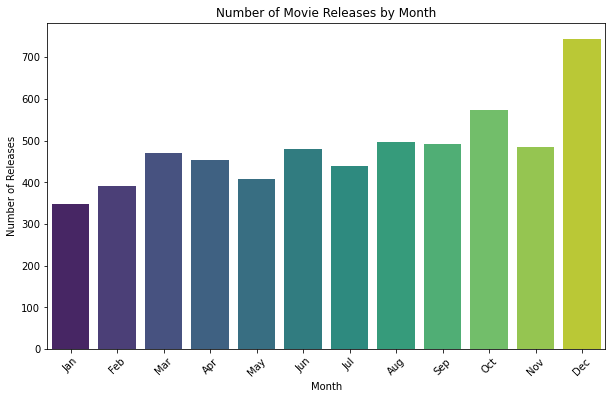

In [ ]:
# Plot the number of releases per month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_data,x='release_month', y='release_count',palette= 'viridis')
plt.title('Number of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

## Analyzing Revenue by Month
We can further plot the average box office revenue for movies released each month to see if there is a correlation between release timing and financial success.

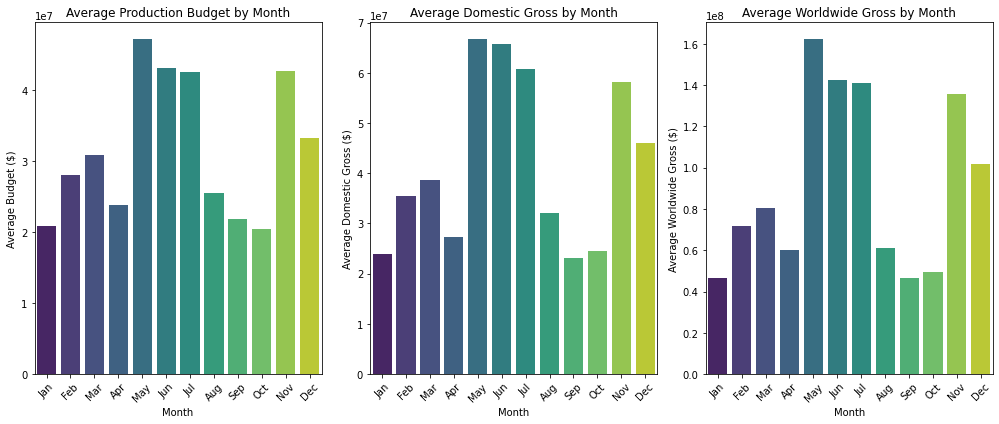

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Average Budget by Month
sns.barplot(data=monthly_data, x='release_month', y='avg_budget', palette='viridis', ax=axs[0])
axs[0].set_title('Average Production Budget by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Budget ($)')
axs[0].set_xticks(range(0, 12))
axs[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=45)

# Average Domestic Gross by Month
sns.barplot(data=monthly_data, x='release_month', y='avg_domestic_gross', palette='viridis', ax=axs[1])
axs[1].set_title('Average Domestic Gross by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Domestic Gross ($)')
axs[1].set_xticks(range(0, 12))
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=45)

# Average Worldwide Gross by Month
sns.barplot(data=monthly_data, x='release_month', y='avg_worldwide_gross', palette='viridis', ax=axs[2])
axs[2].set_title('Average Worldwide Gross by Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Average Worldwide Gross ($)')
axs[2].set_xticks(ticks=range(0,12))
axs[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=45)

plt.tight_layout();

### **Observation**
- Revenue Trends: 
December, July, and May exhibit higher average worldwide and domestic revenues, suggesting that films released in these months tend to perform well financially.
This trend likely reflects the appeal of holiday and summer periods, when audiences have more leisure time to visit theaters.

- Average Production Budget:
December has high average production budgets, likely associated with blockbuster releases targeting the holiday season.
May through July also see relatively high budgets, aligning with summer releases that often aim for large audiences.

## Statistical Analysis 
### Testing for Monthly Release Distribution Uniformity

To determine if movies are uniformly released throughout the year, we can use a chi-square test. This test will help us see if the observed distribution of movie releases across months significantly deviates from a uniform distribution.

In [ ]:
#Calculating Chi-square statistic
from scipy.stats import chisquare

# Perform chi-square test on the frequency of releases per month
observed_releases = monthly_data['release_count'].values
expected_releases = [monthly_data['release_count'].mean()] * 12  # Expected value for uniform distribution

chi_stat, p_value = chisquare(observed_releases, expected_releases)
print(f"Chi-square Statistic: {chi_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The distribution of movie releases across months is significantly different from uniform.")
else:
    print("The distribution of movie releases across months is not significantly different from uniform.")

Chi-square Statistic: 233.34555517122104, P-value: 8.493608319019405e-44
The distribution of movie releases across months is significantly different from uniform.


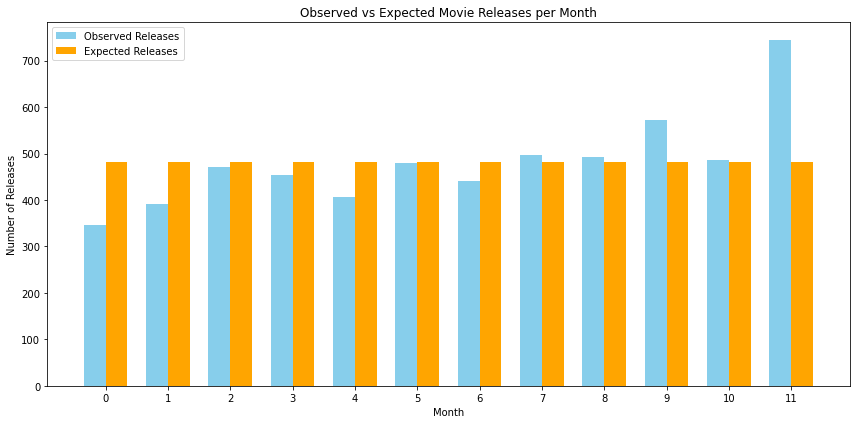

In [ ]:
#Visual representation of the chi-square results
months = monthly_data['release_count'].index
bar_width = 0.35
x = np.arange(len(months))

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot observed releases as bars
plt.bar(x - bar_width/2, observed_releases, width=bar_width, label='Observed Releases', color='skyblue')

# Plot expected releases as bars
plt.bar(x + bar_width/2, expected_releases, width=bar_width, label='Expected Releases', color='orange')

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Observed vs Expected Movie Releases per Month")
plt.xticks(x, months)  # Set x-axis labels to month names
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### **Observation**
- The bar chart is comparing observed and expected monthly movie releases revealing noticeable deviations from a uniform distribution. Specifically, January shows significantly fewer releases than expected, while December has substantially more, suggesting seasonal trends. Smaller but consistent deviations are also visible in months like February, July, and August.
- The chi-square test yields a chi-square statistic of 233.35 and a p-value of 8.49e-44, which is far below the 0.05 significance threshold. This result confirms that the observed distribution of movie releases across months is statistically significantly different from a uniform (even) distribution.

### Recommendation
1.Focus on releasing big-budget movies in December and summer months (May to July) to leverage peak moviegoing times.

2.Allocate larger budgets to films slated for release in these high-performance months, aiming for broad audience appeal and potential blockbuster status.

In [ ]:
# Calculate Total gross
budget['total_gross'] = budget['worldwide_gross'] + budget['domestic_gross']
# Calculate profit
budget['profit'] = (budget['total_gross'] - budget['production_budget'])

budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,total_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,3.536853e+09,3.111853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,1.286728e+09,8.761278e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,1.925247e+08,-1.574753e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1.862020e+09,1.531420e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,1.936903e+09,1.619903e+09


In [ ]:
# Calculate average profit and total_gross by month
monthly_seasonality = budget.groupby('release_month').agg(
    avg_total_gross=('total_gross', 'mean'),
    avg_profit=('profit', 'mean')
).sort_values(by='avg_profit', ascending=False).reset_index()

## Visualizations 
The visuals showing Average Profit and Average Total Gross

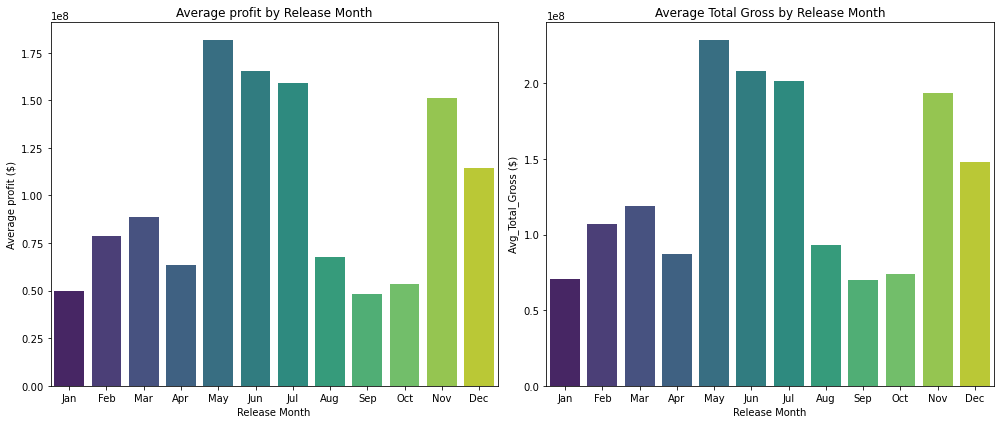

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Average Profit by Month
sns.barplot(data=monthly_seasonality, x=monthly_seasonality['release_month'], y=monthly_seasonality['avg_profit'], palette='viridis', ax=axs[0])
axs[0].set_title("Average profit by Release Month")
axs[0].set_xlabel("Release Month")
axs[0].set_ylabel("Average profit ($)")
axs[0].set_xticks(range(12))
axs[0].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Average Total Gross by Month
sns.barplot(data=monthly_seasonality, x=monthly_seasonality['release_month'], y=monthly_seasonality['avg_total_gross'], palette='viridis', ax=axs[1])
axs[1].set_title("Average Total Gross by Release Month")
axs[1].set_xlabel("Release Month")
axs[1].set_ylabel("Avg_Total_Gross ($)")
axs[1].set_xticks(range(0,12)) 
axs[1].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.tight_layout()
plt.show()

#### Observations
1. From the Barchat, it is clear that Most profitable months to release are during May, June, July, November and December. This is particularly because these are times of the year are both summer and Holiday Seasons where many people have alot of time to watch movies. The Least Profitable months being Jan and September.

## Statistical Analysis

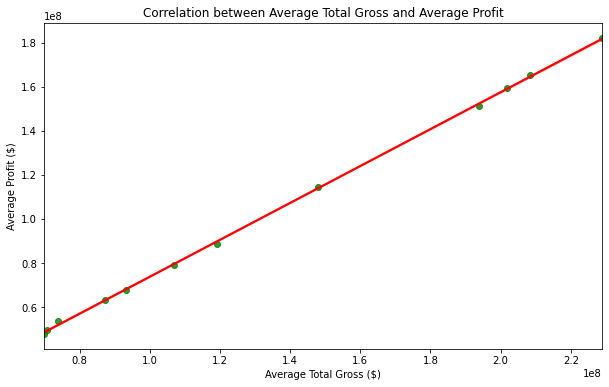

In [ ]:
# Scatter plot with regression line

plt.figure(figsize=(10, 6))

sns.regplot(data=monthly_seasonality, x="avg_total_gross", y="avg_profit", marker="o", color="green", line_kws={"color": "red"})
plt.title("Correlation between Average Total Gross and Average Profit")
plt.xlabel("Average Total Gross ($)")
plt.ylabel("Average Profit ($)")

plt.show()

### **Observation**
- Positive trend of the scatter plot, indicates that as the avg_total_gross increases, the avg_profit also tends to increase.

- The regression line indicates a strong positive linear relationship, where higher total gross amounts are generally associated with higher profits.

In [ ]:
#Pearson Correlation and p-value Analysis

#Null_Hypothesis = There is no linear relationship
#Alternative_Hypothesis = There exits a linear relationship 

#Calculate pearson correlation and p-value
correlation, p_value = pearsonr(monthly_seasonality['avg_total_gross'], monthly_seasonality['avg_profit'])

correlation, p_value

(0.9998499405185896, 5.990445879349743e-19)

### Observations
- With Correlation coefeficient(r) = 0.9998, this is very close to +1, indicating a positive linear relationship between avg_total_gross and avg_profit. This means that as avg_total gross increases, avg_profit consistently increases at a proportional rate.
- p_value = 5.99*10e-19, which is way below the common significance thresholds of 0.05 or 0.01. This means there exits a statistical significance allowing us to reject the null hypothesis that there is no linear relationship between avg_total_gross and avg_profit 

# Summary and Recommendations
1. The studio should consider focusing on high-grossing months (May, June, July,November and December) as these months could yield the greatest profits due to their strong correlation

### 5. How has the average box office revenue changed over time to identify trends that could impact movie production and marketing strategies?

### 6. Which Production Studios and Companies Are Dominating the Box Office?

### 7. Character popularity and group cast impact.Assess the financial impact of major characters and group casts in movies

# Objective 5 
How has the average box office revenue changed over time to identify trends that could impact movie production and marketing strategies?

For this objective, we have to match both income and movies datasets together to have one datafame for our analysis. 

In [ ]:
# Load the revenues dataset
income = pd.read_csv("./DataSets/bom.movie_gross.csv")
income.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# load the movies dataset 
movies = pd.read_csv("./DataSets/tmdb.movies.csv")
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
# merge the movies and revenue datasets to serve objective 5
# preview the first 5 rows 
income_movies_merged = pd.merge(movies, income, on='title', how='inner')
income_movies_merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


Now we have our merged dataset "income_movies_merged"
we will proceed with preview, cleaning, analysis, interpretation and finally conclusion and recommendation 

## Data Inspection 

In [ ]:
#  check overview
income_movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2702 non-null   object 
 11  domestic_gross     2682 non-null   float64
 12  foreign_gross      1723 non-null   object 
 13  year               2703 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 316.8+ KB


In [ ]:
# check the shape 
income_movies_merged.shape

(2703, 14)

In [ ]:
# check for statistical description
income_movies_merged.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,domestic_gross,year
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2.682000e+03,2703.000000
mean,11686.778024,213291.491306,10.002752,6.418572,1358.194599,3.629150e+07,2014.044395
std,7459.175381,139706.978070,7.294182,0.916424,2408.885097,7.734897e+07,2.440458
min,1.000000,1771.000000,0.600000,0.000000,1.000000,1.000000e+02,2010.000000
25%,5289.000000,76493.500000,5.881000,5.900000,78.000000,2.000000e+05,2012.000000
50%,11319.000000,209249.000000,8.627000,6.500000,393.000000,3.800000e+06,2014.000000
75%,17675.000000,334521.500000,12.698500,7.000000,1440.000000,3.882500e+07,2016.000000
max,26506.000000,574534.000000,80.773000,10.000000,22186.000000,9.367000e+08,2018.000000


# Data Cleaning and Processing

In [ ]:
# check for null values 
income_movies_merged.isnull().sum()

Unnamed: 0             0
genre_ids              0
id                     0
original_language      0
original_title         0
popularity             0
release_date           0
title                  0
vote_average           0
vote_count             0
studio                 1
domestic_gross        21
foreign_gross        980
year                   0
dtype: int64

### Data type conversion 
The 'foreign_gross' column is in the form of an object instead of numeric and we must convert to a float. 

In [ ]:
# convert object to foat 
income_movies_merged['foreign_gross'] = income_movies_merged['foreign_gross'].replace({',': ''}, regex=True).astype(float)

### Remove null values 
From our observation, We have three columns wih null values which we should drop for us to achieve our objctive. 

In [ ]:
# drop null values 
df = income_movies_merged.dropna()

In [ ]:
# check the shape after dropping the null values 
df.shape

(1701, 14)

### Drop unnecessary columns 
We have to drop columns which are not important to our study 

In [ ]:
# drop columns 
df_1 = df.drop(columns=["vote_count", "id", "original_language", "original_title","popularity", "genre_ids"])

In [ ]:
# preview the remaining columns 
df_1.columns

Index(['Unnamed: 0', 'release_date', 'title', 'vote_average', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [ ]:

clean_data = df_1.drop(df.columns[0], axis=1)
clean_data.head()

,release_date,title,vote_average,studio,domestic_gross,foreign_gross,year
0,2010-03-26,How to Train Your Dragon,7.7,P/DW,217600000.0,277300000.0,2010
1,2010-05-07,Iron Man 2,6.8,Par.,312400000.0,311500000.0,2010
2,2010-07-16,Inception,8.3,WB,292600000.0,535700000.0,2010
3,2010-06-17,Toy Story 3,7.7,BV,415000000.0,652000000.0,2010
4,2010-07-09,Despicable Me,7.2,Uni.,251500000.0,291600000.0,2010


### Aggregate Revenues 
We will create one column for total revenues from both regions 

In [ ]:
# add one column of total revenues 
clean_data["Total_Revenue"]=clean_data["domestic_gross"] + clean_data["foreign_gross"]

In [ ]:
# save the cleaned data
clean_data.to_csv('./DataSets/Movie_Revenue.csv', index=False)

# 2. Data Analysis 

In [ ]:
# reload cleaned data 
df_clean = pd.read_csv("./DataSets/Movie_Revenue.csv")
df_clean.head()

,release_date,title,vote_average,studio,domestic_gross,foreign_gross,year,Total_Revenue
0,2010-03-26,How to Train Your Dragon,7.7,P/DW,217600000.0,277300000.0,2010,4.949000e+08
1,2010-05-07,Iron Man 2,6.8,Par.,312400000.0,311500000.0,2010,6.239000e+08
2,2010-07-16,Inception,8.3,WB,292600000.0,535700000.0,2010,8.283000e+08
3,2010-06-17,Toy Story 3,7.7,BV,415000000.0,652000000.0,2010,1.067000e+09
4,2010-07-09,Despicable Me,7.2,Uni.,251500000.0,291600000.0,2010,5.431000e+08


### 2.1 Univariate Analysis of Revenues 
Here we analyze the distribution of domestic, foreign and total revenues.

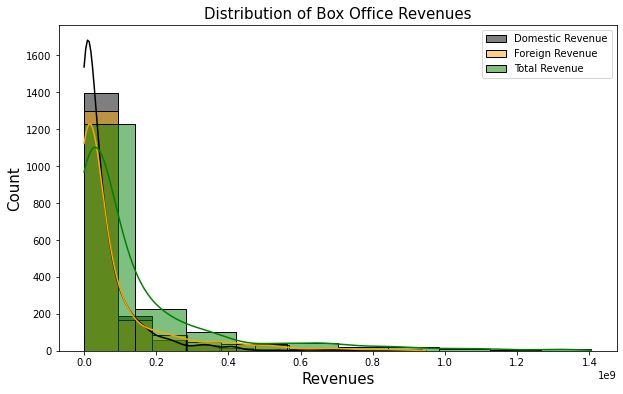

In [ ]:
# use kde plot to visualize the istribution of revenue 
plt.figure(figsize=(10, 6))

sns.histplot(df_clean['domestic_gross'], kde=True, color='black',bins=10, label='Domestic Revenue')
sns.histplot(df_clean['foreign_gross'], kde=True, color='orange',bins = 10, label='Foreign Revenue')
sns.histplot(df_clean['Total_Revenue'], kde=True, color='g',bins=10, label='Total Revenue')
plt.legend()
plt.title('Distribution of Box Office Revenues', fontsize =15)
plt.xlabel("Revenues", fontsize=15)
plt.ylabel("Count", fontsize =15)
plt.show()

#### Interpretation 
From the graph we can note that majority of that data is clusterd and dense torwards the left. This means that majority of the data points are close to zero.

#### 2.1.1 Bivariate analysis of Revenues 
We will plot to see how domestic, foreign and total revenes have changed over years. This will help us understand understand trends over time.

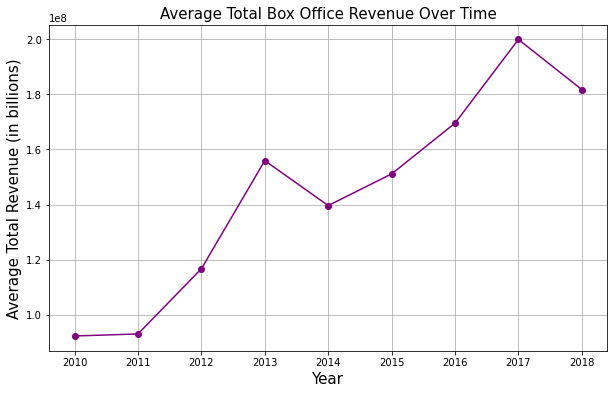

In [ ]:
# plot a line graph of average revenues againast time 

plt.figure(figsize=(10,6))
avg_revenue_by_year = df_clean.groupby('year')['Total_Revenue'].mean() # data grouped by year and average calculated

avg_revenue_by_year.plot(kind='line', marker='o', color='purple')
plt.title('Average Total Box Office Revenue Over Time', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Total Revenue (in billions)', fontsize=15)
plt.grid(True)
plt.show()

### Interpretation 
The line graph shows an upward increase on average revenue. The revenue for the year between 2010 and 2011 showed constance in revenues, however there was a steady increase between the years 2011 and 2013. Again, there was a sharp decline between 2013 and 2014. Stability was again realized between 2014 and 2017. The year 2018 saw revenue decline again.

#### Domestic vs Foreign revenues 
 It is also important for us to look at domestic and foreign revenues separately to spot trends in each region.

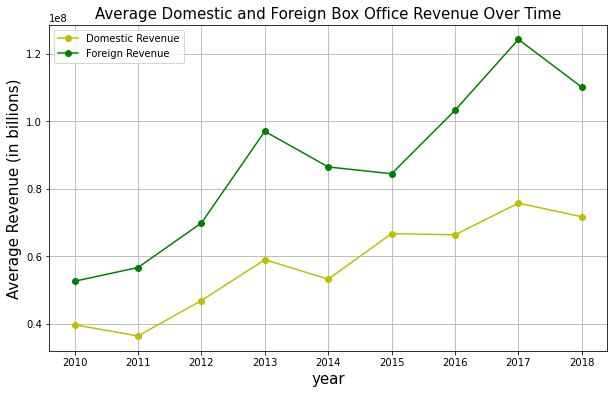

In [ ]:
# calculate and visalize the average revenues for each region 
avg_domestic = df_clean.groupby('year')['domestic_gross'].mean()
avg_foreign = df_clean.groupby('year')['foreign_gross'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_domestic.index, avg_domestic.values,marker='o', label='Domestic Revenue', color='y')
plt.plot(avg_foreign.index, avg_foreign.values,marker='o', label='Foreign Revenue', color='green')
plt.title('Average Domestic and Foreign Box Office Revenue Over Time', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('Average Revenue (in billions)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

### Interpretation 
Both graphs shows an upward trend, meaning that over time, revenue in both the domestic and foreign revenue is generally increasing. This suggests growth in both markets, and this is a positive sign for the movie industry. On average, revenues are rising, however the pattern implies some volatilities.

#### Trend analysis: Rolling averge 
 we wil apply a rolling average to smooth out year-to-year volatility and reveal longer-term trends in box office revenue.

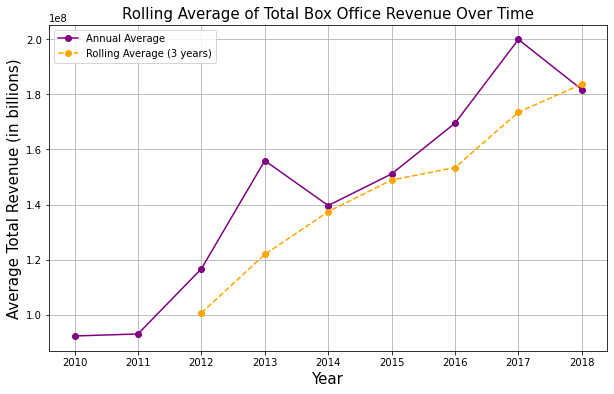

In [ ]:
# 3-year rolling average
avg_revenue_rolling = avg_revenue_by_year.rolling(window=3).mean()  

plt.figure(figsize=(10,6))
avg_revenue_by_year.plot(label='Annual Average',marker='o', color='purple')
avg_revenue_rolling.plot(label='Rolling Average (3 years)',marker='o', color='orange', linestyle='--')
plt.title('Rolling Average of Total Box Office Revenue Over Time',fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Total Revenue (in billions)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

### Interpretation 
The rolling graph show an upward trend in the rolling average suggesting sustained growth in revenue. The stability of the rolling indicates that although there are volatile events, there is an overall growth in revenue.

### Statistical Testing and Anaysis 
Before we embark on any hypothesis testing, we will start by examining the descriptive statistics (mean, median, standard deviation, range) for the different revenue types and years.


In [ ]:
# check the description 
df_clean[['domestic_gross', 'foreign_gross', 'Total_Revenue']].describe()

,domestic_gross,foreign_gross,Total_Revenue
count,1.701000e+03,1.701000e+03,1.701000e+03
mean,5.597406e+07,8.460974e+07,1.405838e+08
std,9.139882e+07,1.437055e+08,2.209891e+08
min,7.000000e+02,6.000000e+02,4.900000e+03
25%,2.500000e+06,5.200000e+06,1.196000e+07
50%,2.510000e+07,2.460000e+07,5.470000e+07
75%,6.600000e+07,8.950000e+07,1.592000e+08
max,9.367000e+08,9.464000e+08,1.405400e+09


##### Hypthesis Testing
##### Two_Sample t-test
We will perform a t-test to compare the means of the revenues in the two regions. 
Our level of significance is 0.05. 


Null Hypothesis: The mean revenues for the two groups are the same.


Alternative Hypothesis: The mean revenes for the two groups are different.

In [ ]:
# Calculate T-test between Domestic and Foreign Revenue
t_stat, p_value = stats.ttest_ind(df_clean['domestic_gross'], df_clean['foreign_gross'])

print("T-statistic:", t_stat)
print("P-value:", p_value)
# use if statement 
if p_value <= 0.05:
    print("Null Hypothesis is rejected")
if p_value > 0.05:
    print("Fail to reject the null hypothesis")

T-statistic: -6.934628358439761
P-value: 4.85384078108989e-12
Null Hypothesis is rejected


#### Interpretation
From our output we can clearly see that p_value is less than our level of significance and therefore we reject the null hypothesis. 
This means that there is a significant variability between the means of revenues for the two regions. 

### Correlation 
A correlaion analysis between domestic and foreign revenues is neccessary to understand the strength and directon of their linear relatioships. Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation).

In [ ]:
# calculate the correlation 
corr = df_clean["domestic_gross"].corr (df_clean["foreign_gross"])
print(corr)
# use if statement to print out the result and its strength 
if corr > 0.7:
    print("There is a strong positive correlation")
elif corr > 0.5:
    print("Moderate positive correlation")
elif corr > 0:
    print("Weak positive correlation")
elif corr == 0:
    print("No correlation")
elif corr > -0.5:
    print("Weak negative correlation")
elif corr > -0.8:
    print("Moderate negative correlation")
else:
    print("Strong negative correlation")


0.754926060746606
There is a strong positive correlation


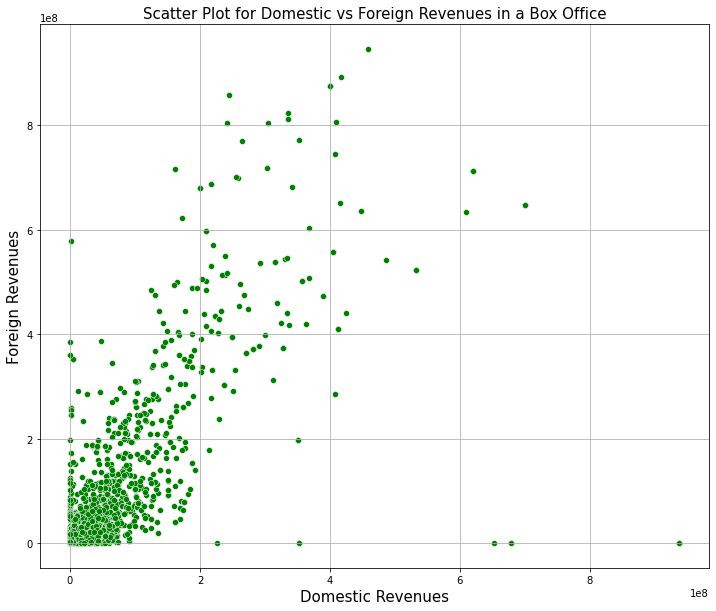

In [ ]:
# scatter plot for this correlation 
plt.figure(figsize=(12,10))
sns.scatterplot(df_clean["domestic_gross"], df_clean["foreign_gross"], color='g')
plt.title("Scatter Plot for Domestic vs Foreign Revenues in a Box Office", fontsize=15)
plt.xlabel("Domestic Revenues", fontsize = 15)
plt.ylabel("Foreign Revenues", fontsize=15)
plt.grid(True)
plt.show()

### Interpretation 
A strong correlation of 0.7 confirms to us that indeed there is a strong relatonship between the revenues in the two regions. This means that if one revenue changes, the other tend to change in a predictable and consistent manner. From the scatter plot we can see the linearity of the data of an upward trend. It indicates that as domestic revenue increase, the foreign revenue tends to increase as well. However, this does not produce a perfect line since there is variability in the data points along the trend. 

## Normality Test
We will check to see the normality and distribution of our numerical data columns. In this case we will use the total revenue column. 

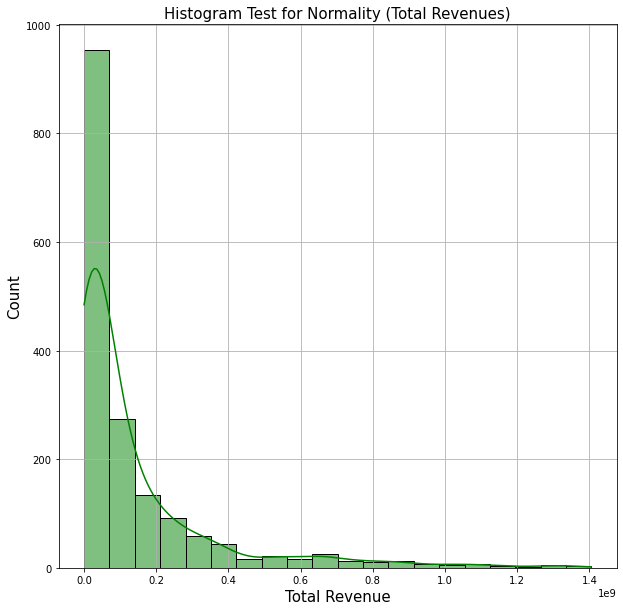

In [ ]:
# use histogram plus kde plot 
plt.figure(figsize=(10, 10))
sns.histplot(df_clean["Total_Revenue"], kde=True, bins =20, color='g');
plt.title("Histogram Test for Normality (Total Revenues)", fontsize=15)
plt.xlabel("Total Revenue", fontsize = 15)
plt.ylabel("Count", fontsize=15)
plt.grid(True)
plt.show()

## Observation 
From our ob
